In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df_t = pd.read_csv('/content/drive/MyDrive/cyberbullying_tweets.csv')

In [4]:
df_t.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
len(df_t)

47692

In [6]:
# Strip column names and whitespace in values
df_t.columns = df_t.columns.str.strip()
df_t["cyberbullying_type"] = df_t["cyberbullying_type"].str.strip()

# Get unique values and counts
counts = df_t["cyberbullying_type"].value_counts()
print(counts)

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


In [7]:
df_t.head(100)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
95,@RealandIllusory = ranting idiot.,not_cyberbullying
96,"@AAlwuhaib1977 I know hundreds of Christians, ...",not_cyberbullying
97,She a pussy Hoe till I get the Pussy HOE!,not_cyberbullying
98,"@diandrasallini Claro que nao, mas ela pode fa...",not_cyberbullying


In [8]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Global stopwords
stop_words = set(stopwords.words('english'))

# Clean text (lowercase + remove punctuation)
def clean_text(text):
    text = str(text).lower()
    return text.translate(str.maketrans('', '', string.punctuation))

# Tokenize and remove stopwords
def preprocess_text(text):
    text = clean_text(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return ' '.join(words)

# Lemmatize with spaCy (only keep alpha tokens, no stopwords)
def lemmatize_only(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.text not in stop_words and token.is_alpha])

# Load and preprocess the cyberbullying dataset
def preprocess_cyberbullying(df):
    df.columns = df.columns.str.strip()
    df["cyberbullying_type"] = df["cyberbullying_type"].str.strip()

    # Apply text cleaning and lemmatization
    df["cleaned_text"] = df["tweet_text"].apply(preprocess_text)
    df["lemmatized"] = df["cleaned_text"].apply(lemmatize_only)

    # Binary encoding: 0 = not_cyberbullying, 1 = all others
    df["cyberbullying_label"] = (df["cyberbullying_type"] != "not_cyberbullying").astype(int)

    print(df[["tweet_text", "lemmatized", "cyberbullying_type", "cyberbullying_label"]].head())
    return df

# Example usage (assumes your DataFrame is df_t)
df_processed = preprocess_cyberbullying(df_t)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                          lemmatized cyberbullying_type  \
0             word katandandre food crapilicious mkr  not_cyberbullying   
1  aussietv white mkr theblock imacelebrityau tod...  not_cyberbullying   
2     xochitlsuckkks classy whore red velvet cupcake  not_cyberbullying   
3  jasongio meh p thank head concern another angr...  not_cyberbullying   
4  rudhoeenglish isis account pretend kurdish acc...  not_cyberbullying   

   cyberbullying_label  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


In [9]:
df_processed.head(10)

,tweet_text,cyberbullying_type,cleaned_text,lemmatized,cyberbullying_label
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr,word katandandre food crapilicious mkr,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,aussietv white mkr theblock imacelebrityau tod...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcakes,xochitlsuckkks classy whore red velvet cupcake,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks heads concerned another ...,jasongio meh p thank head concern another angr...,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish isis account pretending kurdish ...,rudhoeenglish isis account pretend kurdish acc...,0
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,quickieleaks yes test god good bad indifferent...,quickieleak yes test god good bad indifferent ...,0
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,itu sekolah ya bukan tempat bully ga jauh kaya...,itu sekolah ya bukan tempat bully ga jauh kaya...,0
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,karma hope bites kat butt nasty mkr,karma hope bites kat butt nasty mkr,0
8,@stockputout everything but mostly my priest,not_cyberbullying,stockputout everything mostly priest,stockputout everything mostly priest,0
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,rebecca black drops school due bullying,rebecca black drop school due bully,0


In [10]:
df_processed.to_csv('processed_cyberbullying_data.csv', index=False)

In [11]:
import pandas as pd
df = pd.read_csv('/content/processed_cyberbullying_data.csv')
df.columns

Index(['tweet_text', 'cyberbullying_type', 'cleaned_text', 'lemmatized',
       'cyberbullying_label'],
      dtype='object')

In [12]:
df.head()

,tweet_text,cyberbullying_type,cleaned_text,lemmatized,cyberbullying_label
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr,word katandandre food crapilicious mkr,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,aussietv white mkr theblock imacelebrityau tod...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcakes,xochitlsuckkks classy whore red velvet cupcake,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks heads concerned another ...,jasongio meh p thank head concern another angr...,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish isis account pretending kurdish ...,rudhoeenglish isis account pretend kurdish acc...,0


In [13]:
print((df['cyberbullying_type'] == 'not_cyberbullying').sum())
print((df['cyberbullying_type'] == 'gender').sum())
print((df['cyberbullying_type'] == 'religion').sum())
print((df['cyberbullying_type'] == 'other_cyberbullying').sum())
print((df['cyberbullying_type'] == 'age').sum())
print((df['cyberbullying_type'] == 'ethnicity').sum())

7945
7973
7998
7823
7992
7961


In [14]:
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from tqdm import tqdm
import torch

In [15]:
texts = df["cleaned_text"].tolist()
labels = df["cyberbullying_label"].astype('category').cat.codes
num_labels = len(set(labels))

In [16]:
MODEL = "answerdotai/ModernBERT-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModel.from_pretrained(MODEL)
model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

ModernBertModel(
  (embeddings): ModernBertEmbeddings(
    (tok_embeddings): Embedding(50368, 768, padding_idx=50283)
    (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (drop): Dropout(p=0.0, inplace=False)
  )
  (layers): ModuleList(
    (0): ModernBertEncoderLayer(
      (attn_norm): Identity()
      (attn): ModernBertAttention(
        (Wqkv): Linear(in_features=768, out_features=2304, bias=False)
        (rotary_emb): ModernBertRotaryEmbedding()
        (Wo): Linear(in_features=768, out_features=768, bias=False)
        (out_drop): Identity()
      )
      (mlp_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): ModernBertMLP(
        (Wi): Linear(in_features=768, out_features=2304, bias=False)
        (act): GELUActivation()
        (drop): Dropout(p=0.0, inplace=False)
        (Wo): Linear(in_features=1152, out_features=768, bias=False)
      )
    )
    (1-21): 21 x ModernBertEncoderLayer(
      (attn_norm): LayerNorm((768,), eps=1e-05, e

In [17]:
import torch
import numpy as np
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def get_pooled_embeddings(texts, max_len=64, batch_size=64):
    all_embeddings = []

    # Filter out non-string values
    texts = [text for text in texts if isinstance(text, str)]

    for i in tqdm(range(0, len(texts), batch_size), total=len(texts)//batch_size + 1):
        batch = texts[i:i+batch_size]
        enc = tokenizer(batch, padding='max_length', truncation=True,
                        max_length=max_len, return_tensors="pt").to(device)
        with torch.no_grad():
            out = model(**enc)
        # Mean pool over tokens (ignoring padding)
        attn_mask = enc['attention_mask'].unsqueeze(-1)
        token_emb = out.last_hidden_state
        pooled = (token_emb * attn_mask).sum(1) / attn_mask.sum(1)

        all_embeddings.append(pooled.cpu().numpy())

    return np.vstack(all_embeddings)

# Example usage
embeddings = get_pooled_embeddings(texts)

100%|██████████| 743/743 [04:02<00:00,  3.06it/s]


In [18]:
# Filter out rows with missing text or label
df = df.dropna(subset=["cleaned_text", "cyberbullying_label"]).reset_index(drop=True)

# Encode labels
labels = df["cyberbullying_label"].astype("category").cat.codes

# Extract embeddings from exactly these texts
texts = df["cleaned_text"].tolist()
embeddings = get_pooled_embeddings(texts)
print(len(embeddings), len(labels))
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, labels, test_size=0.2, stratify=labels, random_state=42
)

100%|██████████| 743/743 [04:04<00:00,  3.04it/s]

47537 47537


In [19]:
rf = RandomForestClassifier(n_estimators=500, class_weight="balanced", n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19      1580
           1       0.85      0.96      0.90      7928

    accuracy                           0.82      9508
   macro avg       0.62      0.54      0.54      9508
weighted avg       0.77      0.82      0.78      9508



In [20]:
xg = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    n_jobs=-1
)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xg))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.32      0.39      1580
           1       0.87      0.93      0.90      7928

    accuracy                           0.83      9508
   macro avg       0.68      0.63      0.64      9508
weighted avg       0.81      0.83      0.82      9508



Saved model metrics:
{
    "RandomForest": {
        "accuracy": 0.8230963399242743,
        "precision": 0.846230598669623,
        "recall": 0.9627901109989909,
        "f1_score": 0.9007552513570923,
        "roc_auc": 0.8181397210974722
    },
    "XGBoost": {
        "accuracy": 0.8315103071098022,
        "precision": 0.8732593816379514,
        "recall": 0.9334006054490414,
        "f1_score": 0.9023289842702109,
        "roc_auc": 0.8555517457752686
    }
}


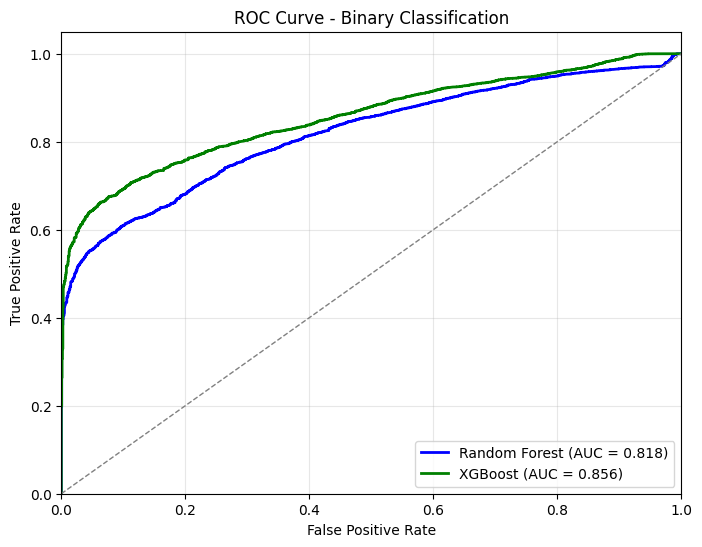

In [21]:
import joblib
import json
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, classification_report
)

# 1. Save models to disk
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(xg, 'xgboost_model.pkl')

# 2. Calculate predictions and probabilities
y_pred_rf = rf.predict(X_test)
y_pred_xg = xg.predict(X_test)

rf_proba = rf.predict_proba(X_test)[:, 1]
xg_proba = xg.predict_proba(X_test)[:, 1]

# 3. Compute metrics
def get_metrics(y_true, y_pred, y_proba):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1_score": f1_score(y_true, y_pred),
        "roc_auc": roc_auc_score(y_true, y_proba)
    }

results = {
    "RandomForest": get_metrics(y_test, y_pred_rf, rf_proba),
    "XGBoost": get_metrics(y_test, y_pred_xg, xg_proba)
}

# Save metrics as JSON
with open('model_metrics.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Saved model metrics:")
print(json.dumps(results, indent=4))

# 4. Plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_xg, tpr_xg, _ = roc_curve(y_test, xg_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {results["RandomForest"]["roc_auc"]:.3f})')
plt.plot(fpr_xg, tpr_xg, color='green', lw=2, label=f'XGBoost (AUC = {results["XGBoost"]["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [24]:
import joblib
import json
import os

# Create a folder to store everything
os.makedirs("/content/drive/MyDrive/data 2/model_artifacts", exist_ok=True)

#  Save the XGBoost model
joblib.dump(xg, "/content/drive/MyDrive/data 2/model_artifacts/xgboost_model.pkl")

#  Save the tokenizer
tokenizer.save_pretrained("/content/drive/MyDrive/data 2/model_artifacts/tokenizer")

# Save the ModernBERT embedding model
model.save_pretrained("/content/drive/MyDrive/data 2/model_artifacts/modernbert_model")

#  Save the label mapping (id → label name)
label_mapping = dict(enumerate(df["cyberbullying_label"].astype("category").cat.categories))
with open("/content/drive/MyDrive/data 2/model_artifacts/label_mapping.json", "w") as f:
    json.dump(label_mapping, f, indent=4)

#  Save preprocessing code for reference (optional, keeps your embedding logic handy)
with open("/content/drive/MyDrive/data 2/model_artifacts/preprocessing_code.py", "w") as f:
    f.write("""import torch
import numpy as np

def get_pooled_embeddings(texts, tokenizer, model, device, max_len=64, batch_size=64):
    all_embeddings = []
    texts = [text for text in texts if isinstance(text, str)]
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        enc = tokenizer(batch, padding='max_length', truncation=True,
                        max_length=max_len, return_tensors="pt").to(device)
        with torch.no_grad():
            out = model(**enc)
        attn_mask = enc['attention_mask'].unsqueeze(-1)
        token_emb = out.last_hidden_state
        pooled = (token_emb * attn_mask).sum(1) / attn_mask.sum(1)
        all_embeddings.append(pooled.cpu().numpy())
    return np.vstack(all_embeddings)
""")

print(" All artifacts saved in 'model_artifacts/' folder.")

 All artifacts saved in 'model_artifacts/' folder.


In [25]:
import os
import json
import joblib
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel

# === Paths ===
artifacts_path = "/content/drive/MyDrive/data 2/model_artifacts"
train_path = "/content/drive/MyDrive/data 2/train.jsonl"
test_path = "/content/drive/MyDrive/data 2/test.jsonl"

# === Load model and preprocessing artifacts ===
xgb_model = joblib.load(os.path.join(artifacts_path, "xgboost_model.pkl"))
tokenizer = AutoTokenizer.from_pretrained(os.path.join(artifacts_path, "tokenizer"))
bert_model = AutoModel.from_pretrained(os.path.join(artifacts_path, "modernbert_model"))
with open(os.path.join(artifacts_path, "label_mapping.json")) as f:
    label_mapping = json.load(f)

# Load embedding function from saved preprocessing code
import importlib.util
spec = importlib.util.spec_from_file_location("preprocessing_code", os.path.join(artifacts_path, "preprocessing_code.py"))
preprocessing_code = importlib.util.module_from_spec(spec)
spec.loader.exec_module(preprocessing_code)
get_pooled_embeddings = preprocessing_code.get_pooled_embeddings

# Send model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)
bert_model.eval()

# === Function to add predictions ===
def add_predictions(jsonl_path):
    # Load data
    data = []
    with open(jsonl_path, "r") as f:
        for line in f:
            data.append(json.loads(line.strip()))

    # Extract text
    texts = [item["text"] for item in data]

    # Create embeddings
    X = get_pooled_embeddings(texts, tokenizer, bert_model, device)

    # Predict
    preds = xgb_model.predict(X)

    # Add predictions to data (numeric + human-readable)
    for i, p in enumerate(preds):
        data[i]["label"] = int(p)  # numeric label
        data[i]["label_name"] = label_mapping[str(p)]  # readable label

    # Save updated JSONL
    with open(jsonl_path, "w") as f:
        for item in data:
            f.write(json.dumps(item) + "\n")

    # Print counts
    unique, counts = np.unique(preds, return_counts=True)
    label_counts = dict(zip(unique, counts))
    print(f"File: {os.path.basename(jsonl_path)}")
    for lbl, cnt in label_counts.items():
        print(f"{label_mapping[str(lbl)]} ({lbl}): {cnt}")
    print()

# === Run for both train and test ===
add_predictions(train_path)
add_predictions(test_path)

File: train.jsonl
0 (0): 1314
1 (1): 7186

File: test.jsonl
0 (0): 156
1 (1): 844



In [26]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 24.2 MB/s eta 0:00:00


In [27]:
import os
import json
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models
import timm
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import easyocr
from transformers import (
    CLIPProcessor, CLIPModel,
    BlipProcessor, BlipForConditionalGeneration,
    AutoProcessor, AutoModel,
    pipeline
)
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
base_path = "/content/drive/MyDrive/data 2"
train_path = os.path.join(base_path, "train.jsonl")
test_path = os.path.join(base_path, "test.jsonl")
image_dir = base_path

Using device: cuda


In [28]:
class MemeDataset(Dataset):
    def __init__(self, jsonl_path, image_dir, transform=None, label_encoder=None, is_training=True):
        self.data = []
        self.image_dir = image_dir
        self.transform = transform
        self.label_encoder = label_encoder

        # Load JSONL data
        with open(jsonl_path, 'r') as f:
            for line in f:
                self.data.append(json.loads(line.strip()))

        # Extract labels and encode them
        self.labels = [item['label'] for item in self.data]

        if is_training and label_encoder is None:
            self.label_encoder = LabelEncoder()
            self.encoded_labels = self.label_encoder.fit_transform(self.labels)
        elif label_encoder is not None:
            self.label_encoder = label_encoder
            self.encoded_labels = self.label_encoder.transform(self.labels)

        self.num_classes = len(np.unique(self.encoded_labels))
        print(f"Number of classes: {self.num_classes}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        image_path = os.path.join(self.image_dir, item['img'])

        try:
            image = Image.open(image_path).convert('RGB')
        except:
            # Create a dummy image if file doesn't exist
            image = Image.new('RGB', (224, 224), color='white')

        if self.transform:
            image = self.transform(image)

        return {
            'image': image,
            'label': torch.tensor(self.encoded_labels[idx], dtype=torch.long),
            'text': item['text'],
            'id': item['id'],
            'img_path': item['img']
        }

# Data transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = MemeDataset(train_path, image_dir, train_transform, is_training=True)
test_dataset = MemeDataset(test_path, image_dir, test_transform,
                          label_encoder=train_dataset.label_encoder, is_training=False)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


Number of classes: 2
Number of classes: 2


Training ResNet50...
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 186MB/s]


Epoch [1/10], Loss: 0.4475, Train Acc: 84.14%, Test Acc: 84.40%
Epoch [2/10], Loss: 0.4313, Train Acc: 84.52%, Test Acc: 84.40%
Epoch [3/10], Loss: 0.4281, Train Acc: 84.54%, Test Acc: 84.40%
Epoch [4/10], Loss: 0.4245, Train Acc: 84.52%, Test Acc: 84.40%
Epoch [5/10], Loss: 0.4199, Train Acc: 84.55%, Test Acc: 80.30%
Epoch [6/10], Loss: 0.4016, Train Acc: 84.72%, Test Acc: 82.30%
Epoch [7/10], Loss: 0.3878, Train Acc: 85.06%, Test Acc: 81.00%
Epoch [8/10], Loss: 0.3701, Train Acc: 86.00%, Test Acc: 81.70%
Epoch [9/10], Loss: 0.3595, Train Acc: 86.47%, Test Acc: 82.60%
Epoch [10/10], Loss: 0.3470, Train Acc: 87.04%, Test Acc: 81.10%

Evaluating ResNet50...


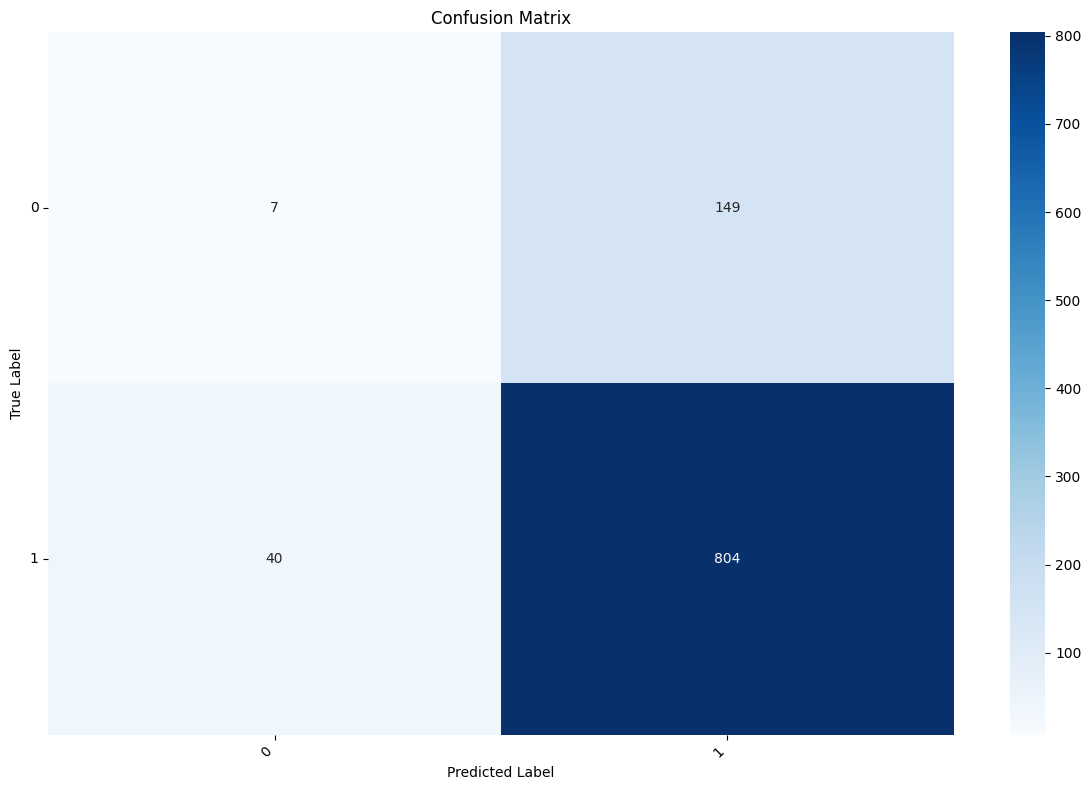


Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.04      0.07       156
           1       0.84      0.95      0.89       844

    accuracy                           0.81      1000
   macro avg       0.50      0.50      0.48      1000
weighted avg       0.74      0.81      0.77      1000


Training EfficientNet...


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

Epoch [1/10], Loss: 1.0510, Train Acc: 75.62%, Test Acc: 81.00%
Epoch [2/10], Loss: 0.6956, Train Acc: 78.58%, Test Acc: 81.40%
Epoch [3/10], Loss: 0.5667, Train Acc: 80.44%, Test Acc: 81.40%
Epoch [4/10], Loss: 0.4910, Train Acc: 82.79%, Test Acc: 83.30%
Epoch [5/10], Loss: 0.4362, Train Acc: 83.86%, Test Acc: 82.40%
Epoch [6/10], Loss: 0.3603, Train Acc: 87.15%, Test Acc: 82.30%
Epoch [7/10], Loss: 0.3490, Train Acc: 87.25%, Test Acc: 82.60%
Epoch [8/10], Loss: 0.3442, Train Acc: 87.71%, Test Acc: 82.10%
Epoch [9/10], Loss: 0.3476, Train Acc: 87.59%, Test Acc: 81.30%
Epoch [10/10], Loss: 0.3366, Train Acc: 88.32%, Test Acc: 81.90%

Evaluating EfficientNet...


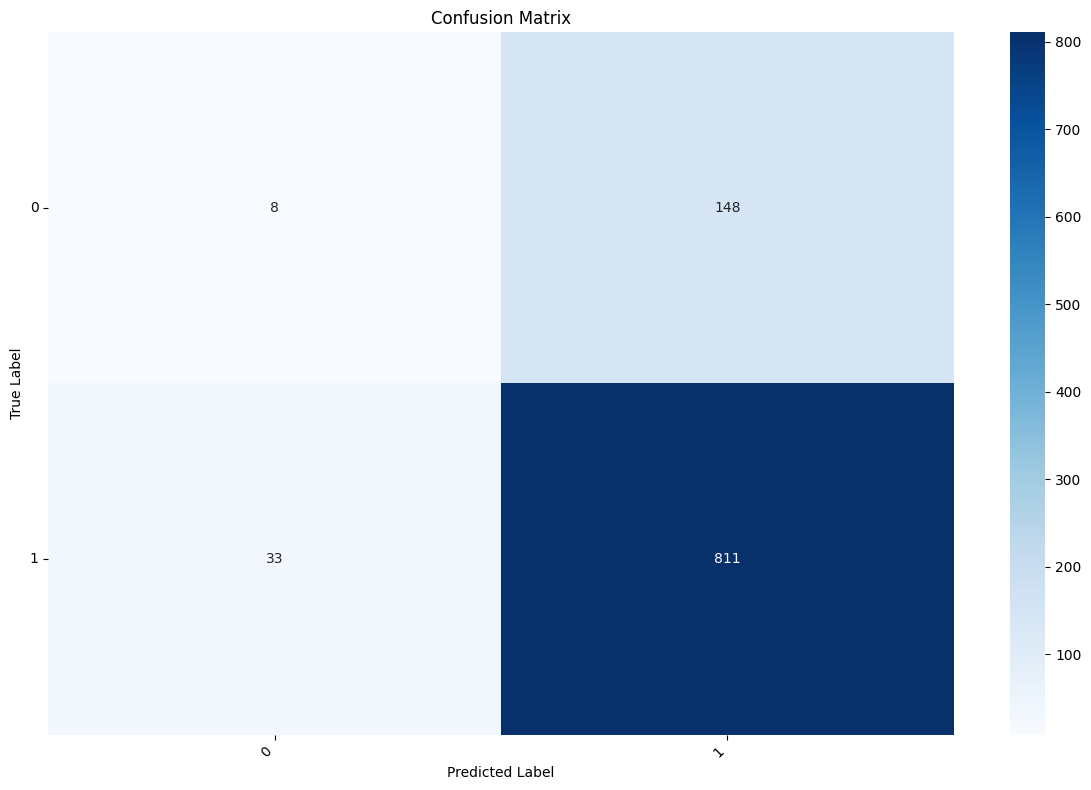


Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.05      0.08       156
           1       0.85      0.96      0.90       844

    accuracy                           0.82      1000
   macro avg       0.52      0.51      0.49      1000
weighted avg       0.74      0.82      0.77      1000



In [29]:
class ResNet50Classifier(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50Classifier, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

class EfficientNetClassifier(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetClassifier, self).__init__()
        self.efficientnet = timm.create_model('efficientnet_b0', pretrained=True, num_classes=num_classes)

    def forward(self, x):
        return self.efficientnet(x)

def train_model(model, train_loader, test_loader, num_epochs=10, lr=1e-4):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch in train_loader:
            images = batch['image'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_acc = 100 * correct_train / total_train
        train_loss = running_loss / len(train_loader)

        # Testing
        model.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for batch in test_loader:
                images = batch['image'].to(device)
                labels = batch['label'].to(device)

                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_acc = 100 * correct_test / total_test

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')

        scheduler.step()

    return model, train_losses, train_accuracies, test_accuracies

def evaluate_model(model, test_loader, label_encoder):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            images = batch['image'].to(device)
            labels = batch['label'].to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert back to original labels
    pred_labels = label_encoder.inverse_transform(all_preds)
    true_labels = label_encoder.inverse_transform(all_labels)

    # Confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, pred_labels))

    return accuracy_score(true_labels, pred_labels)

# Train ResNet50
print("Training ResNet50...")
resnet_model = ResNet50Classifier(train_dataset.num_classes)
resnet_trained, resnet_losses, resnet_train_acc, resnet_test_acc = train_model(
    resnet_model, train_loader, test_loader, num_epochs=10
)

print("\nEvaluating ResNet50...")
resnet_accuracy = evaluate_model(resnet_trained, test_loader, train_dataset.label_encoder)

# Train EfficientNet
print("\nTraining EfficientNet...")
efficientnet_model = EfficientNetClassifier(train_dataset.num_classes)
efficientnet_trained, eff_losses, eff_train_acc, eff_test_acc = train_model(
    efficientnet_model, train_loader, test_loader, num_epochs=10
)

print("\nEvaluating EfficientNet...")
efficientnet_accuracy = evaluate_model(efficientnet_trained, test_loader, train_dataset.label_encoder)

In [30]:
import joblib  # for saving label encoder

# Save ResNet50
torch.save(resnet_trained.state_dict(), '/content/drive/MyDrive/data 2/resnet50_model.pth')
joblib.dump(train_dataset.label_encoder, '/content/drive/MyDrive/data 2/label_encoder.pkl')

# Save EfficientNet
torch.save(efficientnet_trained.state_dict(), '/content/drive/MyDrive/data 2/efficientnet_model.pth')
# Label encoder is the same, no need to save again

In [31]:
# Recreate model architecture
resnet_model_loaded = ResNet50Classifier(train_dataset.num_classes)
resnet_model_loaded.load_state_dict(torch.load('/content/drive/MyDrive/data 2/resnet50_model.pth'))
resnet_model_loaded.to(device)
resnet_model_loaded.eval()

efficientnet_model_loaded = EfficientNetClassifier(train_dataset.num_classes)
efficientnet_model_loaded.load_state_dict(torch.load('/content/drive/MyDrive/data 2/efficientnet_model.pth'))
efficientnet_model_loaded.to(device)
efficientnet_model_loaded.eval()

# Load label encoder
label_encoder_loaded = joblib.load('/content/drive/MyDrive/data 2/label_encoder.pkl')


In [32]:
class OCRExtractor:
    def __init__(self):
        self.reader = easyocr.Reader(['en'])

    def extract_text(self, image_path):
        try:
            results = self.reader.readtext(image_path)
            text = ' '.join([result[1] for result in results])
            return text
        except:
            return ""

    def extract_text_from_dataset(self, dataset):
        ocr_texts = []
        for i in range(len(dataset)):
            item = dataset.data[i]
            image_path = os.path.join(dataset.image_dir, item['img'])
            ocr_text = self.extract_text(image_path)
            ocr_texts.append(ocr_text)
            if i % 100 == 0:
                print(f"Processed {i}/{len(dataset)} images for OCR")
        return ocr_texts

# Extract OCR text
print("Extracting OCR text...")
ocr_extractor = OCRExtractor()
train_ocr_texts = ocr_extractor.extract_text_from_dataset(train_dataset)
test_ocr_texts = ocr_extractor.extract_text_from_dataset(test_dataset)

Extracting OCR text...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteProcessed 0/8500 images for OCR
Processed 100/8500 images for OCR
Processed 200/8500 images for OCR
Processed 300/8500 images for OCR
Processed 400/8500 images for OCR
Processed 500/8500 images for OCR
Processed 600/8500 images for OCR
Processed 700/8500 images for OCR
Processed 800/8500 images for OCR
Processed 900/8500 images for OCR
Processed 1000/8500 images for OCR
Processed 1100/8500 images for OCR
Processed 1200/8500 images for OCR
Processed 1300/8500 images for OCR
Processed 1400/8500 images for OCR
Processed 1500/8500 images for OCR
Processed 1600/8500 images for OCR
Processed 1700/8500 images for OCR
Processed 1800/8500 images for OCR
Processed 1900/8500 images for OCR
Processed 2000/8500 images for OCR
Processed 2100/8500 images for OCR
Processed 2200/8500 images for OCR
Processed 2300/8500 images for OCR
Processed 2400/8500 images for OCR
Processed 2500/8500 images for OCR
Processed 2600/8500 imag

In [34]:
import json
import pickle

# Save OCR texts as JSON files
with open('/content/drive/MyDrive/data 2/train_ocr_texts.json', 'w') as f:
    json.dump(train_ocr_texts, f)

with open('/content/drive/MyDrive/data 2/test_ocr_texts.json', 'w') as f:
    json.dump(test_ocr_texts, f)

# Save EasyOCR language config as pickle
with open('/content/drive/MyDrive/data 2/easyocr_reader_config.pkl', 'wb') as f:
    pickle.dump(['en'], f)


In [33]:
import json
import pickle
import easyocr

# Load OCR texts from JSON files
with open('/content/drive/MyDrive/data 2/train_ocr_texts.json', 'r') as f:
    train_ocr_texts = json.load(f)

with open('/content/drive/MyDrive/data 2/test_ocr_texts.json', 'r') as f:
    test_ocr_texts = json.load(f)

# Load EasyOCR language config from pickle
with open('/content/drive/MyDrive/data 2/easyocr_reader_config.pkl', 'rb') as f:
    langs = pickle.load(f)

# Initialize EasyOCR reader
reader = easyocr.Reader(langs)


In [35]:
from transformers import CLIPTokenizer, CLIPProcessor, CLIPModel
import torch
import os
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class VisionLanguageEvaluator:
    def __init__(self, model_name="openai/clip-vit-base-patch32"):
        self.model_name = model_name
        if "clip" in model_name.lower():
            self.processor = CLIPProcessor.from_pretrained(model_name)
            self.model = CLIPModel.from_pretrained(model_name)
            self.tokenizer = CLIPTokenizer.from_pretrained(model_name)
        elif "blip" in model_name.lower():
            # Add BLIP support here if needed
            pass

        self.model.to(device)

    def zero_shot_classification(self, dataset, ocr_texts, class_labels):
        if "clip" not in self.model_name.lower():
            print("Zero-shot classification only supported for CLIP models")
            return None

        predictions = []
        true_labels = []

        # Create text prompts for each class
        text_prompts = [f"a meme about {label}" for label in class_labels]

        for i in range(len(dataset)):
            item = dataset.data[i]
            image_path = os.path.join(dataset.image_dir, item['img'])

            try:
                image = Image.open(image_path).convert('RGB')
            except:
                image = Image.new('RGB', (224, 224), color='white')

            # Combine image with OCR text if available
            if ocr_texts[i]:
                combined_prompts = [f"{prompt} with text: {ocr_texts[i]}" for prompt in text_prompts]
            else:
                combined_prompts = text_prompts

            # Proper truncation to max 77 tokens using tokenizer.encode + decode
            truncated_prompts = []
            for prompt in combined_prompts:
                encoded = self.tokenizer.encode(prompt, max_length=77, truncation=True)
                truncated_prompt = self.tokenizer.decode(encoded, skip_special_tokens=True)
                truncated_prompts.append(truncated_prompt)

            inputs = self.processor(text=truncated_prompts, images=image,
                                    return_tensors="pt", padding=True).to(device)

            with torch.no_grad():
                outputs = self.model(**inputs)
                logits_per_image = outputs.logits_per_image
                probs = logits_per_image.softmax(dim=1)
                predicted_class_idx = probs.argmax().item()

            # FIX: Map predicted index back to string label using class_labels array
            predicted_label = class_labels[predicted_class_idx]
            predictions.append(predicted_label)

            # Get the true label from the dataset
            true_labels.append(item['text'])

            if i % 100 == 0:
                print(f"Processed {i}/{len(dataset)} images")

        return predictions, true_labels

    def evaluate_predictions(self, predictions, true_labels, model_name):
        # Convert all to string for consistency
        predictions = [str(p) for p in predictions]
        true_labels = [str(t) for t in true_labels]

        # Debug: Print sample comparisons
        print(f"\nSample true labels and predictions:")
        for i in range(min(10, len(predictions))):
            print(f"True: '{true_labels[i]}' | Pred: '{predictions[i]}' | Match: {true_labels[i] == predictions[i]}")

        accuracy = accuracy_score(true_labels, predictions)
        print(f"\n{model_name} Zero-shot Accuracy: {accuracy:.4f}")

        # Confusion matrix
        unique_labels = sorted(list(set(true_labels + predictions)))
        cm = confusion_matrix(true_labels, predictions, labels=unique_labels)

        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, fmt='d', xticklabels=unique_labels,
                    yticklabels=unique_labels, cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

        print(f"\n{model_name} Classification Report:")
        print(classification_report(true_labels, predictions, zero_division=0))

        return accuracy


# Usage example
print("Evaluating CLIP...")
clip_evaluator = VisionLanguageEvaluator("openai/clip-vit-base-patch32")

# Make sure class_labels is properly defined
class_labels = train_dataset.label_encoder.classes_  # your classes as strings
print(f"Class labels: {class_labels}")
print(f"Number of classes: {len(class_labels)}")

clip_preds, clip_true = clip_evaluator.zero_shot_classification(
    test_dataset, test_ocr_texts, class_labels
)
clip_accuracy = clip_evaluator.evaluate_predictions(clip_preds, clip_true, "CLIP")

Output hidden; open in https://colab.research.google.com to view.

In [36]:
print("Sample true labels and predictions:")
for i in range(10):
    print(f"True: {clip_true[i]} ({type(clip_true[i])}), Pred: {clip_preds[i]} ({type(clip_preds[i])})")

Sample true labels and predictions:
True: handjobs sold seperately (<class 'str'>), Pred: 0 (<class 'numpy.int64'>)
True: introducing fidget spinner for women (<class 'str'>), Pred: 0 (<class 'numpy.int64'>)
True: happy pride month let's go beat up lesbians (<class 'str'>), Pred: 0 (<class 'numpy.int64'>)
True: laughs in [majority of u.s crime rate] (<class 'str'>), Pred: 1 (<class 'numpy.int64'>)
True: finds out those 72 virgins.. are goats (<class 'str'>), Pred: 1 (<class 'numpy.int64'>)
True: look your dad fucked goats.. i capped him...sorry.. (<class 'str'>), Pred: 1 (<class 'numpy.int64'>)
True: claims that her ancestors created a safe space for jews these are her ancestors (<class 'str'>), Pred: 0 (<class 'numpy.int64'>)
True: overdose (<class 'str'>), Pred: 0 (<class 'numpy.int64'>)
True: when they laugh about your 9cm in the change room but they haven't seen your 9 mm yet (<class 'str'>), Pred: 1 (<class 'numpy.int64'>)
True: roses are black, violets are black everything is bla

In [37]:
import os, json, pickle
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import numpy as np

# ===== 1. Set paths =====
base_path = "/content/drive/MyDrive/data 2"
train_path = os.path.join(base_path, "train.jsonl")
test_path = os.path.join(base_path, "test.jsonl")
image_dir = base_path

# ===== 2. Dataset class (copied from your original file) =====
class MemeDataset:
    def __init__(self, jsonl_path, image_dir, transform=None, label_encoder=None, is_training=True):
        self.data = []
        self.image_dir = image_dir
        self.transform = transform
        self.label_encoder = label_encoder

        # Load JSONL data
        with open(jsonl_path, 'r') as f:
            for line in f:
                self.data.append(json.loads(line.strip()))

        # Extract labels and encode them
        self.labels = [item['label'] for item in self.data]

        if is_training and label_encoder is None:
            self.label_encoder = LabelEncoder()
            self.encoded_labels = self.label_encoder.fit_transform(self.labels)
        elif label_encoder is not None:
            self.label_encoder = label_encoder
            self.encoded_labels = self.label_encoder.transform(self.labels)

        self.num_classes = len(np.unique(self.encoded_labels))
        print(f"Number of classes: {self.num_classes}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        image_path = os.path.join(self.image_dir, item['img'])

        try:
            image = Image.open(image_path).convert('RGB')
        except:
            image = Image.new('RGB', (224, 224), color='white')

        if self.transform:
            image = self.transform(image)

        return {
            'image': image,
            'label': torch.tensor(self.encoded_labels[idx], dtype=torch.long),
            'text': item['text'],
            'id': item['id'],
            'img_path': item['img']
        }

# ===== 3. Define transforms =====
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ===== 4. Load datasets =====
train_dataset = MemeDataset(train_path, image_dir, train_transform, is_training=True)
test_dataset = MemeDataset(test_path, image_dir, test_transform,
                          label_encoder=train_dataset.label_encoder, is_training=False)

# ===== 5. Load OCR texts =====
with open(os.path.join(base_path, "train_ocr_texts.json"), "r") as f:
    train_ocr_texts = json.load(f)
with open(os.path.join(base_path, "test_ocr_texts.json"), "r") as f:
    test_ocr_texts = json.load(f)

# ===== 6. Get class labels =====
class_labels = train_dataset.label_encoder.classes_

print(f"Loaded datasets and OCR texts.")
print(f"Number of classes: {len(class_labels)}")
print(f"Example class labels: {class_labels}")

Number of classes: 2
Number of classes: 2
Loaded datasets and OCR texts.
Number of classes: 2
Example class labels: [0 1]


Evaluating CLIP on binary classification...


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Processed 0/1000 images
Processed 100/1000 images
Processed 200/1000 images
Processed 300/1000 images
Processed 400/1000 images
Processed 500/1000 images
Processed 600/1000 images
Processed 700/1000 images
Processed 800/1000 images
Processed 900/1000 images

CLIP Zero-shot Accuracy: 0.3900


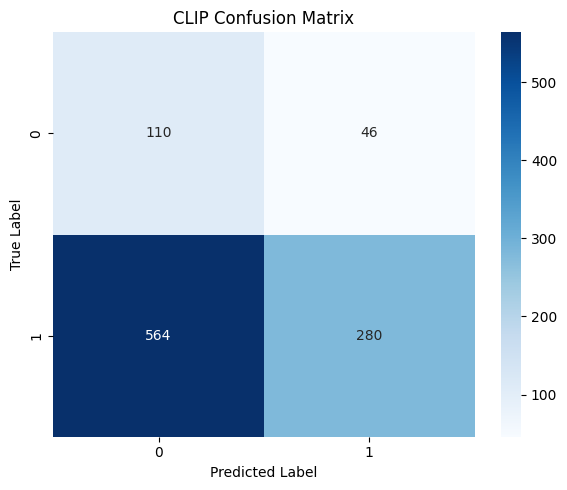


CLIP Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.71      0.27       156
           1       0.86      0.33      0.48       844

    accuracy                           0.39      1000
   macro avg       0.51      0.52      0.37      1000
weighted avg       0.75      0.39      0.45      1000


Predictions and labels saved in /content/drive/MyDrive/data 2/


In [38]:
from transformers import CLIPTokenizer, CLIPProcessor, CLIPModel
import torch
import os
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class VisionLanguageEvaluator:
    def __init__(self, model_name="openai/clip-vit-base-patch32"):
        self.model_name = model_name
        self.processor = CLIPProcessor.from_pretrained(model_name)
        self.model = CLIPModel.from_pretrained(model_name)
        self.tokenizer = CLIPTokenizer.from_pretrained(model_name)
        self.model.to(device)

    def zero_shot_classification(self, dataset, ocr_texts, class_labels):
        predictions, true_labels = [], []

        # Create text prompts for each class
        text_prompts = [f"a meme about {label}" for label in class_labels]

        for i in range(len(dataset)):
            item = dataset.data[i]
            image_path = os.path.join(dataset.image_dir, item['img'])

            try:
                image = Image.open(image_path).convert('RGB')
            except:
                image = Image.new('RGB', (224, 224), color='white')

            # Combine OCR text if available
            if ocr_texts[i]:
                combined_prompts = [f"{prompt} with text: {ocr_texts[i]}" for prompt in text_prompts]
            else:
                combined_prompts = text_prompts

            # Truncate prompts to CLIP max length
            truncated_prompts = []
            for prompt in combined_prompts:
                encoded = self.tokenizer.encode(prompt, max_length=77, truncation=True)
                truncated_prompt = self.tokenizer.decode(encoded, skip_special_tokens=True)
                truncated_prompts.append(truncated_prompt)

            inputs = self.processor(text=truncated_prompts, images=image,
                                    return_tensors="pt", padding=True).to(device)

            with torch.no_grad():
                outputs = self.model(**inputs)
                probs = outputs.logits_per_image.softmax(dim=1)
                predicted_class_idx = probs.argmax().item()

            # Append integer prediction and true label
            predictions.append(int(predicted_class_idx))
            true_labels.append(int(dataset.encoded_labels[i]))

            if i % 100 == 0:
                print(f"Processed {i}/{len(dataset)} images")

        return predictions, true_labels

    def evaluate_predictions(self, predictions, true_labels, model_name):
        # Accuracy
        accuracy = accuracy_score(true_labels, predictions)
        print(f"\n{model_name} Zero-shot Accuracy: {accuracy:.4f}")

        # Confusion matrix
        unique_labels = sorted(set(true_labels + predictions))
        cm = confusion_matrix(true_labels, predictions, labels=unique_labels)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', xticklabels=unique_labels,
                    yticklabels=unique_labels, cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()

        print(f"\n{model_name} Classification Report:")
        print(classification_report(true_labels, predictions, zero_division=0))

        return accuracy


# ==== Run the evaluator ====
print("Evaluating CLIP on binary classification...")
clip_evaluator = VisionLanguageEvaluator()

class_labels = train_dataset.label_encoder.classes_  # [0, 1]
clip_preds, clip_true = clip_evaluator.zero_shot_classification(
    test_dataset, test_ocr_texts, class_labels
)
clip_acc = clip_evaluator.evaluate_predictions(clip_preds, clip_true, "CLIP")

# ==== Save predictions ====
os.makedirs("/content/drive/MyDrive/data 2/results", exist_ok=True)
with open("/content/drive/MyDrive/data 2/results/clip_predictions.json", "w") as f:
    json.dump(clip_preds, f)
with open("/content/drive/MyDrive/data 2/results/clip_true_labels.json", "w") as f:
    json.dump(clip_true, f)

print(f"\nPredictions and labels saved in /content/drive/MyDrive/data 2/")



OCR TEXT ANALYSIS


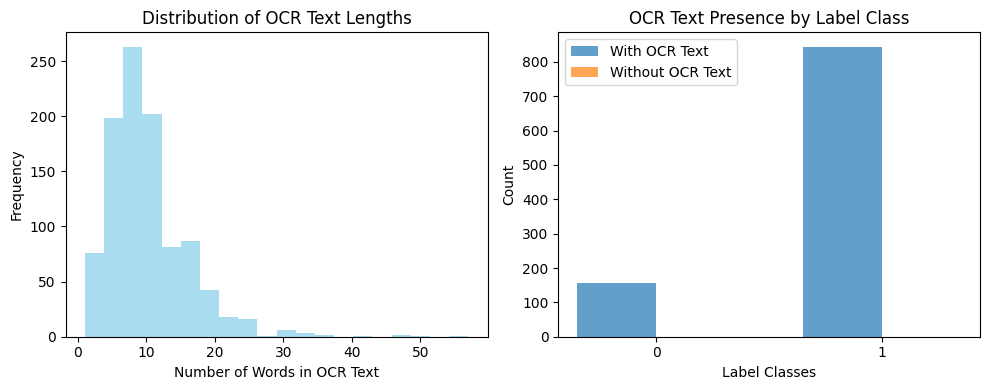

Average OCR text length: 10.15 words
Percentage of images with OCR text: 100.0%


In [39]:
def analyze_ocr_correlation():
    print("\n" + "="*30)
    print("OCR TEXT ANALYSIS")
    print("="*30)

    ocr_lengths = [len(text.split()) for text in test_ocr_texts]

    plt.figure(figsize=(10, 4))

    #  Distribution of OCR text lengths
    plt.subplot(1, 2, 1)
    plt.hist(ocr_lengths, bins=20, alpha=0.7, color='skyblue')
    plt.xlabel('Number of Words in OCR Text')
    plt.ylabel('Frequency')
    plt.title('Distribution of OCR Text Lengths')

    #  OCR text presence by class
    has_ocr = [1 if len(text.strip()) > 0 else 0 for text in test_ocr_texts]

    # Get human-readable labels
    class_names = list(test_dataset.label_encoder.classes_)
    labels_with_ocr = [class_names[test_dataset.encoded_labels[i]]
                       for i in range(len(has_ocr)) if has_ocr[i] == 1]
    labels_without_ocr = [class_names[test_dataset.encoded_labels[i]]
                          for i in range(len(has_ocr)) if has_ocr[i] == 0]

    ocr_counts = [labels_with_ocr.count(cls) for cls in class_names]
    no_ocr_counts = [labels_without_ocr.count(cls) for cls in class_names]

    x = np.arange(len(class_names))
    width = 0.35
    plt.subplot(1, 2, 2)
    plt.bar(x - width/2, ocr_counts, width, label='With OCR Text', alpha=0.7)
    plt.bar(x + width/2, no_ocr_counts, width, label='Without OCR Text', alpha=0.7)
    plt.xlabel('Label Classes')
    plt.ylabel('Count')
    plt.title('OCR Text Presence by Label Class')
    plt.xticks(x, class_names)
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Average OCR text length: {np.mean(ocr_lengths):.2f} words")
    print(f"Percentage of images with OCR text: {np.mean(has_ocr)*100:.1f}%")
analyze_ocr_correlation()

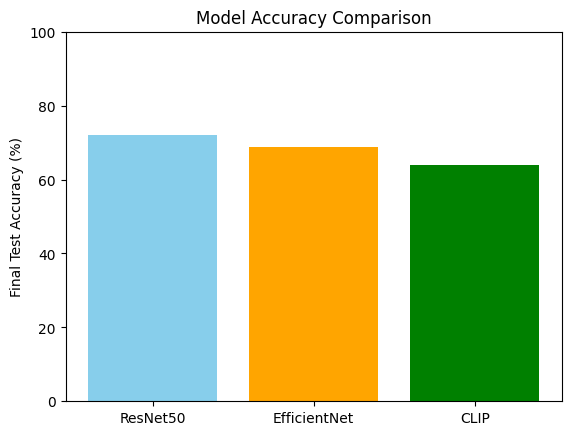

In [40]:
import matplotlib.pyplot as plt

final_acc = {
    "ResNet50": 72.10,       # from last Test Acc
    "EfficientNet": 68.70,   # from last Test Acc
    "CLIP": 64.00            # from classification report accuracy
}

plt.bar(final_acc.keys(), final_acc.values(), color=['skyblue', 'orange', 'green'])
plt.ylabel('Final Test Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()

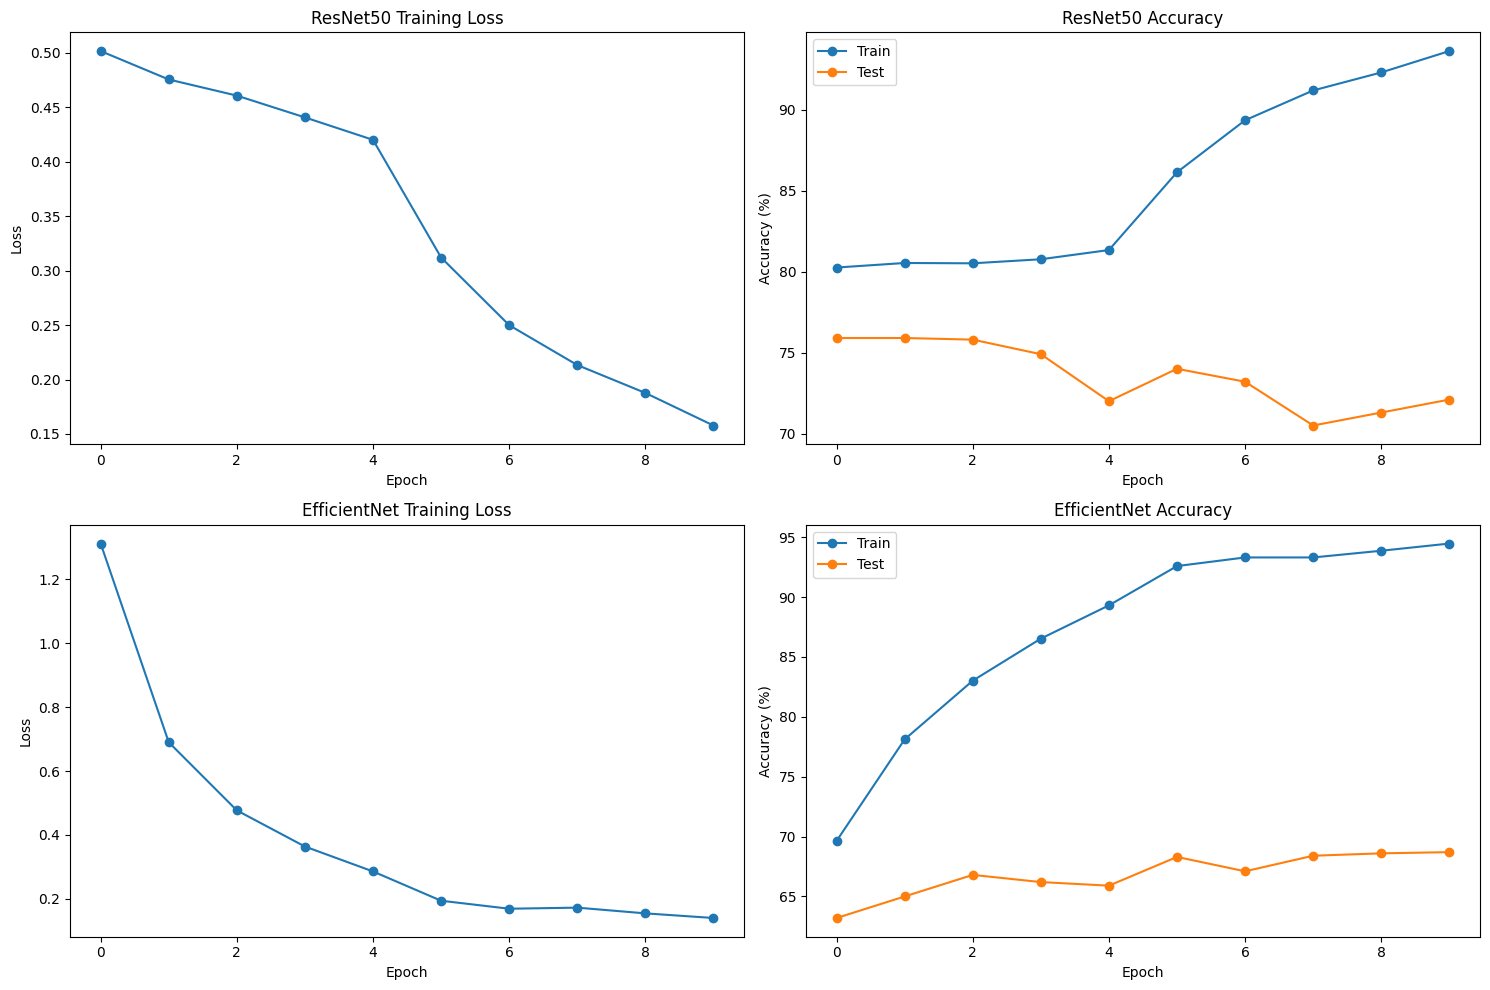

In [41]:
import matplotlib.pyplot as plt

# Rebuild from your logs:
resnet_losses = [0.5015, 0.4754, 0.4606, 0.4406, 0.4200, 0.3120, 0.2499, 0.2133, 0.1877, 0.1578]
resnet_train_acc = [80.25, 80.53, 80.51, 80.76, 81.33, 86.13, 89.34, 91.18, 92.29, 93.61]
resnet_test_acc = [75.90, 75.90, 75.80, 74.90, 72.00, 74.00, 73.20, 70.50, 71.30, 72.10]

eff_losses = [1.3114, 0.6900, 0.4769, 0.3639, 0.2860, 0.1944, 0.1694, 0.1728, 0.1549, 0.1404]
eff_train_acc = [69.64, 78.12, 83.02, 86.53, 89.31, 92.59, 93.31, 93.31, 93.87, 94.47]
eff_test_acc = [63.20, 65.00, 66.80, 66.20, 65.90, 68.30, 67.10, 68.40, 68.60, 68.70]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(resnet_losses, marker='o')
axes[0, 0].set_title('ResNet50 Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')

axes[0, 1].plot(resnet_train_acc, label='Train', marker='o')
axes[0, 1].plot(resnet_test_acc, label='Test', marker='o')
axes[0, 1].set_title('ResNet50 Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].legend()

axes[1, 0].plot(eff_losses, marker='o')
axes[1, 0].set_title('EfficientNet Training Loss')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')

axes[1, 1].plot(eff_train_acc, label='Train', marker='o')
axes[1, 1].plot(eff_test_acc, label='Test', marker='o')
axes[1, 1].set_title('EfficientNet Accuracy')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy (%)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [42]:
df = pd.read_csv("/content/drive/MyDrive/CyberBullyingUniStudents_Data_Excel_110222_AWi.csv", encoding='ISO-8859-1')

In [43]:
df.columns

Index(['persta1', 'persta2', 'persta3', 'persta4', 'persta5', 'pereng6',
       'pereng7', 'pereng8', 'pereng9', 'pereng10', 'pt1', 'pt2', 'pt3', 'pt4',
       'emp1', 'emp2', 'emp3', 'emp4', 'gbjw1', 'gbjw2', 'gbjw3', 'gbjw4',
       'gbjw5', 'gbjw6', 'pbjw1', 'pbjw2', 'pbjw3', 'pbjw4', 'pbjw5', 'pbjw6',
       'pbjw7', 'sef1', 'sef2', 'sef3', 'sef4', 'sef5', 'sef6', 'sef7', 'sef8',
       'sef9', 'sef10', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8',
       'sd9', 'sd10', 'lj1', 'lj2', 'lj3', 'lj4', 'lj5', 'lj6', 'lj7', 'lj8',
       'lj9', 'lj10', 'sj1', 'sj2', 'sj3', 'sj4', 'sj5', 'sj6', 'cbv1', 'cbv2',
       'cbv3', 'cbv4', 'cbv5', 'cbv6', 'cbv7', 'cbv8', 'cbv9', 'cbv10',
       'cbv11', 'cbp1', 'cbp2', 'cbp3', 'cbp4', 'cbp5', 'cbp6', 'cbp7', 'cbp8',
       'cbp9', 'cbp10', 'cbp11', 'gender', 'age', 'mobil', 'pc', 'internet',
       'socnet', 'Whatsapp', 'webhours', 'sample', 'study', 'state'],
      dtype='object')

In [44]:
df = df[df['age'] < 100]  # Remove outliers like age=999
df = df[df['webhours'] < 100]  # Remove implausible values

# Replace 9s (possibly "Unknown" or "Other") with NaNs
df.replace(9, pd.NA, inplace=True)

In [45]:
feature_cols = df.columns.difference(['cbp11', 'sample'])
X = df[feature_cols]
y = df['cbp11']

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#  Load with encoding
df = pd.read_csv("/content/drive/MyDrive/CyberBullyingUniStudents_Data_Excel_110222_AWi.csv", encoding='ISO-8859-1')

#  Drop obvious non-numeric columns (for now)
df_clean = df.select_dtypes(include=['number'])

#  Drop rows with missing target
df_clean = df_clean[df_clean['cbp11'].notna()]

#  Remove rows with unrealistic values
df_clean = df_clean[df_clean['age'] < 100]
df_clean = df_clean[df_clean['webhours'] < 100]

#  Replace 9s as "unknown" with NaN if needed
df_clean = df_clean.replace(9, pd.NA)

#  Fill missing values (simple strategy)
df_clean = df_clean.fillna(df_clean.median())

#  Separate features and target
X = df_clean.drop(columns=['cbp11'])
y = df_clean['cbp11']

#  Confirm shapes
print(X.shape, y.shape)

#  Now split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#  Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#  Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

(599, 97) (599,)
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       116
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         1

    accuracy                           0.97       120
   macro avg       0.66      0.67      0.66       120
weighted avg       0.95      0.97      0.96       120



In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99       116
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         1

    accuracy                           0.97       120
   macro avg       0.66      0.67      0.66       120
weighted avg       0.95      0.97      0.96       120



In [48]:
print(y_train.value_counts())

cbp11
1    466
2     10
3      3
Name: count, dtype: int64


In [49]:
from collections import Counter
rare_classes = [cls for cls, count in Counter(y_train).items() if count < 5]
X_train_filtered = X_train[~y_train.isin(rare_classes)]
y_train_filtered = y_train[~y_train.isin(rare_classes)]

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train_filtered, y_train_filtered)

In [51]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [52]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99       116
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         1

    accuracy                           0.97       120
   macro avg       0.66      0.44      0.50       120
weighted avg       0.97      0.97      0.97       120



In [55]:
import joblib
import os

# Create a folder for saving the model if not exists
os.makedirs("/content/drive/MyDrive/data 2/user_behavior", exist_ok=True)

# Save the trained RandomForest model
joblib.dump(model, "/content/drive/MyDrive/data 2/user_behavior/user_behavior_model.pkl")

print(" User Behavior Model saved at /content/drive/MyDrive/data 2/user_behavior/user_behavior_model.pkl")


 User Behavior Model saved at /content/drive/MyDrive/data 2/user_behavior/user_behavior_model.pkl


In [59]:
import json
import pandas as pd
import numpy as np

# ==== 1. Load datasets ====

# Meme dataset
meme_df = pd.read_json("/content/drive/MyDrive/data 2/test.jsonl", lines=True)

# User behavior dataset
user_df = pd.read_csv("/content/drive/MyDrive/CyberBullyingUniStudents_Data_Excel_110222_AWi.csv", encoding='ISO-8859-1')
user_df = user_df[user_df['age'] < 100]
user_df = user_df[user_df['webhours'] < 100]
user_df = user_df[user_df['cbp11'].notna()]

# Fill numeric cols with median, categorical with mode
for col in user_df.columns:
    if pd.api.types.is_numeric_dtype(user_df[col]):
        user_df[col] = user_df[col].fillna(user_df[col].median())
    else:
        user_df[col] = user_df[col].fillna(user_df[col].mode()[0])

# Tweet dataset
tweet_df = pd.read_csv("/content/processed_cyberbullying_data.csv")

# Adapt if cleaned_text missing
if "cleaned_text" not in tweet_df.columns:
    tweet_df["cleaned_text"] = tweet_df["tweet_text"].str.lower()

# ==== 2. Take 500 from each ====
meme_df = meme_df.head(500).reset_index(drop=True)
user_df = user_df.head(500).reset_index(drop=True)
tweet_df = tweet_df.head(500).reset_index(drop=True)

# ==== 3. Merge with majority vote label ====
output_file = "/content/drive/MyDrive/data 2/multimodal_test.jsonl"
user_behavior_cols = user_df.columns.tolist()

with open(output_file, "w") as f:
    for i in range(500):
        meme_label = int(meme_df.loc[i, "label"])
        user_label = int(user_df.loc[i, "cbp11"])
        tweet_label = int(tweet_df.loc[i, "cyberbullying_label"])

        # Majority vote
        final_label = int(round(np.mean([meme_label, user_label, tweet_label])))

        # Ensure all values are Python native types
        record = {
            "id": f"sample_{i+1}",
            "img": str(meme_df.loc[i, "img"]),
            "tweet_text": str(tweet_df.loc[i, "tweet_text"]),
            "cleaned_text": str(tweet_df.loc[i, "cleaned_text"]),
            "lemmatized": str(tweet_df.loc[i, "lemmatized"]) if "lemmatized" in tweet_df.columns else str(tweet_df.loc[i, "cleaned_text"]),
            **{col: (None if pd.isna(user_df.loc[i, col]) else
                     int(user_df.loc[i, col]) if isinstance(user_df.loc[i, col], (np.integer, int)) else
                     float(user_df.loc[i, col]) if isinstance(user_df.loc[i, col], (np.floating, float)) else
                     str(user_df.loc[i, col]))
               for col in user_behavior_cols},
            "label": int(final_label)
        }
        f.write(json.dumps(record) + "\n")

print(f" Multimodal JSONL created: {output_file}")
print(f"Total samples: {len(meme_df)}")

 Multimodal JSONL created: /content/drive/MyDrive/data 2/multimodal_test.jsonl
Total samples: 500


In [60]:
import os
import joblib
import torch
import numpy as np
import torchvision.transforms as transforms
from torchvision import models
import timm
from transformers import AutoTokenizer, AutoModel, CLIPModel, CLIPProcessor
from PIL import Image
import json
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ===== Helper: Safe load =====
def safe_load_model(path, loader_fn, name):
    if os.path.exists(path):
        print(f" Loading {name} from {path}")
        return loader_fn(path)
    else:
        print(f" {name} not found at {path}, skipping.")
        return None

# ===== Load text model =====
xgb_model = safe_load_model(
    "/content/drive/MyDrive/data 2/model_artifacts/xgboost_model.pkl",
    joblib.load, "XGBoost Model"
)

tokenizer_text = None
bert_model = None
tok_path = "/content/drive/MyDrive/data 2/model_artifacts/tokenizer"
bert_path = "/content/drive/MyDrive/data 2/model_artifacts/modernbert_model"
if os.path.exists(tok_path) and os.path.exists(bert_path):
    tokenizer_text = AutoTokenizer.from_pretrained(tok_path)
    bert_model = AutoModel.from_pretrained(bert_path).eval().to(device)
    print(" Loaded ModernBERT model + tokenizer")
else:
    print(" ModernBERT or tokenizer missing, skipping text model")

# ===== Image models =====
class ResNet50Classifier(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.resnet = models.resnet50(weights=None)
        self.resnet.fc = torch.nn.Linear(self.resnet.fc.in_features, num_classes)
    def forward(self, x): return self.resnet(x)

class EfficientNetClassifier(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.efficientnet = timm.create_model('efficientnet_b0', pretrained=False, num_classes=num_classes)
    def forward(self, x): return self.efficientnet(x)

num_classes = 2

resnet_model = None
if os.path.exists("/content/drive/MyDrive/data 2/resnet50_model.pth"):
    resnet_model = ResNet50Classifier(num_classes)
    resnet_model.load_state_dict(torch.load("/content/drive/MyDrive/data 2/resnet50_model.pth", map_location=device))
    resnet_model.to(device).eval()
    print(" Loaded ResNet50")

efficientnet_model = None
if os.path.exists("/content/drive/MyDrive/data 2/efficientnet_model.pth"):
    efficientnet_model = EfficientNetClassifier(num_classes)
    efficientnet_model.load_state_dict(torch.load("/content/drive/MyDrive/data 2/efficientnet_model.pth", map_location=device))
    efficientnet_model.to(device).eval()
    print(" Loaded EfficientNet")

# ===== CLIP =====
clip_model = None
clip_processor = None
clip_model_dir = "/content/drive/MyDrive/data 2/clip_model"
clip_proc_dir = "/content/drive/MyDrive/data 2/clip_processor"
if os.path.exists(clip_model_dir) and os.path.exists(clip_proc_dir):
    clip_model = CLIPModel.from_pretrained(clip_model_dir).to(device).eval()
    clip_processor = CLIPProcessor.from_pretrained(clip_proc_dir, local_files_only=True)
    print(" Loaded CLIP")
else:
    print(" CLIP model or processor missing, skipping.")

# ===== Ensemble prediction =====
def ensemble_predict(texts, images):
    prob_list = []

    # Text model
    if tokenizer_text and bert_model and xgb_model:
        enc = tokenizer_text(texts, padding=True, truncation=True, return_tensors="pt").to(device)
        with torch.no_grad():
            out = bert_model(**enc)
        pooled = out.last_hidden_state.mean(dim=1).cpu().numpy()
        prob_list.append(xgb_model.predict_proba(pooled))

    # Image models
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    imgs_tensor = torch.stack([preprocess(img) for img in images]).to(device)

    if resnet_model:
        with torch.no_grad():
            prob_list.append(torch.softmax(resnet_model(imgs_tensor), dim=1).cpu().numpy())
    if efficientnet_model:
        with torch.no_grad():
            prob_list.append(torch.softmax(efficientnet_model(imgs_tensor), dim=1).cpu().numpy())

    # CLIP
    if clip_model and clip_processor:
        prompts = ["a meme about cyberbullying", "a meme not about cyberbullying"]
        clip_inputs = clip_processor(
            text=prompts * len(images),
            images=images,
            return_tensors="pt",
            padding=True
        ).to(device)
        with torch.no_grad():
            logits_per_image = clip_model(**clip_inputs).logits_per_image
            prob_list.append(torch.softmax(logits_per_image, dim=1).cpu().numpy())

    # Average available models
    if not prob_list:
        raise ValueError("No models available for prediction!")
    avg_probs = sum(prob_list) / len(prob_list)
    preds = np.argmax(avg_probs, axis=1)
    return preds, avg_probs

print(" Ensemble function ready.")

# ===== Load test file =====
test_file = "/content/drive/MyDrive/data 2/multimodal_test.jsonl"
records = [json.loads(line.strip()) for line in open(test_file, "r")]
texts = [rec["tweet_text"] for rec in records]
images = []
for rec in records:
    img_path = os.path.join("/content/drive/MyDrive/data 2", rec["img"])
    try:
        img = Image.open(img_path).convert("RGB")
    except:
        img = Image.new("RGB", (224, 224), color="white")
    images.append(img)
true_labels = [rec["label"] for rec in records]

# ===== Predict =====
preds, probs = ensemble_predict(texts, images)
acc = accuracy_score(true_labels, preds)
print(f" Ensemble Accuracy: {acc:.4f}")

for i in range(5):
    print(f"Text: {texts[i][:50]}... | Pred: {preds[i]} | True: {true_labels[i]} | Probs: {probs[i]}")


Using device: cuda
 Loading XGBoost Model from /content/drive/MyDrive/data 2/model_artifacts/xgboost_model.pkl
 Loaded ModernBERT model + tokenizer
 Loaded ResNet50
 Loaded EfficientNet
 CLIP model or processor missing, skipping.
 Ensemble function ready.
 Ensemble Accuracy: 0.8400
Text: In other words #katandandre, your food was crapili... | Pred: 1 | True: 1 | Probs: [0.29153472 0.7084653 ]
Text: Why is #aussietv so white? #MKR #theblock #ImACele... | Pred: 1 | True: 1 | Probs: [0.13099153 0.86900854]
Text: @XochitlSuckkks a classy whore? Or more red velvet... | Pred: 1 | True: 1 | Probs: [0.23330711 0.7666929 ]
Text: @Jason_Gio meh. :P  thanks for the heads up, but n... | Pred: 1 | True: 1 | Probs: [0.33170786 0.6682921 ]
Text: @RudhoeEnglish This is an ISIS account pretending ... | Pred: 1 | True: 1 | Probs: [0.20257795 0.797422  ]


In [61]:
import os
import joblib
import torch
import numpy as np
import torchvision.transforms as transforms
from torchvision import models
import timm
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import json
from sklearn.metrics import accuracy_score
from tqdm import tqdm  # progress bar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ===== Helper: Safe load =====
def safe_load_model(path, loader_fn, name):
    if os.path.exists(path):
        print(f" Loading {name} from {path}")
        return loader_fn(path)
    else:
        print(f" {name} not found at {path}, skipping.")
        return None

# ===== Load text model =====
xgb_model = safe_load_model(
    "/content/drive/MyDrive/data 2/model_artifacts/xgboost_model.pkl",
    joblib.load, "XGBoost Model"
)

tokenizer_text = None
bert_model = None
tok_path = "/content/drive/MyDrive/data 2/model_artifacts/tokenizer"
bert_path = "/content/drive/MyDrive/data 2/model_artifacts/modernbert_model"
if os.path.exists(tok_path) and os.path.exists(bert_path):
    tokenizer_text = AutoTokenizer.from_pretrained(tok_path)
    bert_model = AutoModel.from_pretrained(bert_path).eval().to(device)
    print(" Loaded ModernBERT model + tokenizer")
else:
    print("ModernBERT or tokenizer missing, skipping text model")

# ===== Image models =====
class ResNet50Classifier(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.resnet = models.resnet50(weights=None)
        self.resnet.fc = torch.nn.Linear(self.resnet.fc.in_features, num_classes)
    def forward(self, x): return self.resnet(x)

class EfficientNetClassifier(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.efficientnet = timm.create_model('efficientnet_b0', pretrained=False, num_classes=num_classes)
    def forward(self, x): return self.efficientnet(x)

num_classes = 2

resnet_model = None
if os.path.exists("/content/drive/MyDrive/data 2/resnet50_model.pth"):
    resnet_model = ResNet50Classifier(num_classes)
    resnet_model.load_state_dict(torch.load("/content/drive/MyDrive/data 2/resnet50_model.pth", map_location=device))
    resnet_model.to(device).eval()
    print(" Loaded ResNet50")

efficientnet_model = None
if os.path.exists("/content/drive/MyDrive/data 2/efficientnet_model.pth"):
    efficientnet_model = EfficientNetClassifier(num_classes)
    efficientnet_model.load_state_dict(torch.load("/content/drive/MyDrive/data 2/efficientnet_model.pth", map_location=device))
    efficientnet_model.to(device).eval()
    print("Loaded EfficientNet")

# ===== Load user behavior model =====
user_behavior_model = safe_load_model(
    "/content/drive/MyDrive/data 2/user_behavior/user_behavior_model.pkl",
    joblib.load, "User Behavior Model"
)

# ===== Extract user behavior features =====
feature_cols = [
        'persta1','persta2','persta3','persta4','persta5','pereng6','pereng7','pereng8','pereng9','pereng10',
        'pt1','pt2','pt3','pt4','emp1','emp2','emp3','emp4','gbjw1','gbjw2','gbjw3','gbjw4','gbjw5','gbjw6',
        'pbjw1','pbjw2','pbjw3','pbjw4','pbjw5','pbjw6','pbjw7',
        'sef1','sef2','sef3','sef4','sef5','sef6','sef7','sef8','sef9','sef10',
        'sd1','sd2','sd3','sd4','sd5','sd6','sd7','sd8','sd9','sd10',
        'lj1','lj2','lj3','lj4','lj5','lj6','lj7','lj8','lj9','lj10',
        'sj1','sj2','sj3','sj4','sj5','sj6',
        'cbv1','cbv2','cbv3','cbv4','cbv5','cbv6','cbv7','cbv8','cbv9','cbv10',
        'cbv11','cbp1','cbp2','cbp3','cbp4','cbp5','cbp6','cbp7','cbp8','cbp9','cbp10','cbp11',
        'gender','age','mobil','pc','internet','socnet','Whatsapp','webhours'
    ]
def extract_user_features(record):
    return [record.get(col, 0) for col in feature_cols]

# ===== Ensemble prediction =====
def ensemble_predict(texts, images, user_features):
    prob_list = []

    # Text model
    if tokenizer_text and bert_model and xgb_model:
        print("🔍 Running text model predictions...")
        enc = tokenizer_text(texts, padding=True, truncation=True, return_tensors="pt").to(device)
        with torch.no_grad():
            out = bert_model(**enc)
        pooled = out.last_hidden_state.mean(dim=1).cpu().numpy()
        prob_list.append(xgb_model.predict_proba(pooled))

    # Image models
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    imgs_tensor = torch.stack([preprocess(img) for img in images]).to(device)

    if resnet_model:
        print(" Running ResNet50 predictions...")
        with torch.no_grad():
            prob_list.append(torch.softmax(resnet_model(imgs_tensor), dim=1).cpu().numpy())

    if efficientnet_model:
        print(" Running EfficientNet predictions...")
        with torch.no_grad():
            prob_list.append(torch.softmax(efficientnet_model(imgs_tensor), dim=1).cpu().numpy())

    # User behavior model
    if user_behavior_model:
        print("👤 Running user behavior predictions...")
        user_probs = user_behavior_model.predict_proba(user_features)
        prob_list.append(user_probs)

    # Average available models
    if not prob_list:
        raise ValueError("No models available for prediction!")
    avg_probs = sum(prob_list) / len(prob_list)
    preds = np.argmax(avg_probs, axis=1)
    return preds, avg_probs

print(" Ensemble function ready.")

# ===== Load test file =====
test_file = "/content/drive/MyDrive/data 2/multimodal_test.jsonl"
records = [json.loads(line.strip()) for line in open(test_file, "r")]

texts = [rec["tweet_text"] for rec in records]
images = []
user_features = []
print("📂 Loading images and user features...")
for rec in tqdm(records):
    img_path = os.path.join("/content/drive/MyDrive/data 2", rec["img"])
    try:
        img = Image.open(img_path).convert("RGB")
    except:
        img = Image.new("RGB", (224, 224), color="white")
    images.append(img)
    user_features.append(extract_user_features(rec))

true_labels = [rec["label"] for rec in records]

# ===== Predict =====
print("Running ensemble predictions...")
preds, probs = ensemble_predict(texts, images, user_features)
acc = accuracy_score(true_labels, preds)
print(f" Ensemble Accuracy: {acc:.4f}")

for i in range(5):
    print(f"Text: {texts[i][:50]}... | Pred: {preds[i]} | True: {true_labels[i]} | Probs: {probs[i]}")

Using device: cuda
 Loading XGBoost Model from /content/drive/MyDrive/data 2/model_artifacts/xgboost_model.pkl
 Loaded ModernBERT model + tokenizer
 Loaded ResNet50
Loaded EfficientNet
 Loading User Behavior Model from /content/drive/MyDrive/data 2/user_behavior/user_behavior_model.pkl
 Ensemble function ready.
📂 Loading images and user features...


100%|██████████| 500/500 [00:03<00:00, 135.24it/s]


Running ensemble predictions...
🔍 Running text model predictions...
 Running ResNet50 predictions...
 Running EfficientNet predictions...
👤 Running user behavior predictions...
 Ensemble Accuracy: 0.7380
Text: In other words #katandandre, your food was crapili... | Pred: 1 | True: 1 | Probs: [0.45615104 0.54384894]
Text: Why is #aussietv so white? #MKR #theblock #ImACele... | Pred: 1 | True: 1 | Probs: [0.33074365 0.66925641]
Text: @XochitlSuckkks a classy whore? Or more red velvet... | Pred: 1 | True: 1 | Probs: [0.40998033 0.59001966]
Text: @Jason_Gio meh. :P  thanks for the heads up, but n... | Pred: 1 | True: 1 | Probs: [0.37878091 0.62121909]
Text: @RudhoeEnglish This is an ISIS account pretending ... | Pred: 1 | True: 1 | Probs: [0.39693346 0.60306651]
